In [1]:
import pandas as pd

import numpy as np
np.set_printoptions(threshold=np.inf)

import plotly.express as px

simplify the dataset

---

In [2]:
sales_dataset = pd.read_csv("og_farmers_market_sales_2324.csv")

# Only keep the columns we need
columns_of_interest = ['Date', 'Time', 'Item', 'Qty']

sales_dataset = sales_dataset[columns_of_interest]

sales_dataset

,Date,Time,Item,Qty
0,2023-10-28,11:41:41,Drink 2 - Cold Brew - FM,1.0
1,2023-10-28,11:40:39,Croissant - Pain Au Chocolat - FM,1.0
2,2023-10-28,11:40:39,Croissant - Pumpkin Croissant - FM,1.0
3,2023-10-28,11:34:11,Croissant - Pumpkin Croissant - FM,1.0
4,2023-10-28,11:33:24,Croissant - Pain Au Chocolat - FM,1.0
...,...,...,...,...
11844,2024-05-18,07:14:30,Butter Croissant - FM,1.0
11845,2024-05-18,07:13:11,Kouign Amann - FM,1.0
11846,2024-05-18,07:10:47,Almond Croissant - FM,1.0
11847,2024-05-18,07:10:18,Ube & Strawberry Croissant - FM,1.0


In [3]:
print("Before:")
print(sales_dataset.dtypes)

# Merge 'Date' and 'Time' into a single datetime column
sales_dataset["Datetime"] = pd.to_datetime(sales_dataset["Date"] + " " + sales_dataset["Time"])

# Drop old 'Date' and 'Time' columns
#sales_dataset.drop(columns=["Date", "Time"], inplace=True)

# Extract the month and year for aggregation
#sales_dataset["Week"] = sales_dataset["Datetime"].dt.to_period("W")
#sales_dataset["Week_TimeStamp"] = sales_dataset["Week"].dt.to_timestamp() # Different way to represent the week for plotting

print("\nAfter:")
print(sales_dataset.dtypes)

Before:
Date     object
Time     object
Item     object
Qty     float64
dtype: object

After:
Date                object
Time                object
Item                object
Qty                float64
Datetime    datetime64[ns]
dtype: object


In [11]:
daily_sales_amounts = sales_dataset.groupby("Date")['Qty'].sum().astype(int)

daily_sales_amounts = daily_sales_amounts.reset_index() # Makes Hour into a Column instead of just an Index, which makes plotting easier
daily_sales_amounts

,Date,Qty
0,2023-05-20,403
1,2023-05-27,484
2,2023-06-03,453
3,2023-06-10,428
4,2023-06-17,485
5,2023-06-20,2
6,2023-06-24,487
7,2023-07-15,400
8,2023-07-22,404
9,2023-07-29,373


In [13]:
# Create the plot using Plotly Express
fig = px.line(daily_sales_amounts, x='Date', y='Qty', title="Items Sold per Day", markers=True)

# Show the plot
fig.show()

In [4]:
sales_dataset["Hour"] = sales_dataset["Datetime"].dt.to_period("H").dt.to_timestamp()

In [5]:
sales_dataset_23 = (sales_dataset[(sales_dataset["Datetime"].dt.year == 2023)])

In [6]:
sales_dataset_23

,Date,Time,Item,Qty,Datetime,Hour
0,2023-10-28,11:41:41,Drink 2 - Cold Brew - FM,1.0,2023-10-28 11:41:41,2023-10-28 11:00:00
1,2023-10-28,11:40:39,Croissant - Pain Au Chocolat - FM,1.0,2023-10-28 11:40:39,2023-10-28 11:00:00
2,2023-10-28,11:40:39,Croissant - Pumpkin Croissant - FM,1.0,2023-10-28 11:40:39,2023-10-28 11:00:00
3,2023-10-28,11:34:11,Croissant - Pumpkin Croissant - FM,1.0,2023-10-28 11:34:11,2023-10-28 11:00:00
4,2023-10-28,11:33:24,Croissant - Pain Au Chocolat - FM,1.0,2023-10-28 11:33:24,2023-10-28 11:00:00
...,...,...,...,...,...,...
5657,2023-05-20,07:34:51,Croissant - Butter - FM,2.0,2023-05-20 07:34:51,2023-05-20 07:00:00
5658,2023-05-20,07:34:51,Croissant - Ube & Strawberry - FM,2.0,2023-05-20 07:34:51,2023-05-20 07:00:00
5659,2023-05-20,07:34:51,Muffin - Guilt Free - FM,1.0,2023-05-20 07:34:51,2023-05-20 07:00:00
5660,2023-05-20,07:32:54,Drink 1 - Drip Coffee - FM,1.0,2023-05-20 07:32:54,2023-05-20 07:00:00


In [38]:
sales_dataset_10_23 = (sales_dataset_23[(sales_dataset_23["Week_TimeStamp"] == "2023-10-23")])

In [39]:
sales_dataset_10_23

,Item,Qty,Datetime,Week,Week_TimeStamp,Hour
0,Drink 2 - Cold Brew - FM,1.0,2023-10-28 11:41:41,2023-10-23/2023-10-29,2023-10-23,2023-10-28 11:00:00
1,Croissant - Pain Au Chocolat - FM,1.0,2023-10-28 11:40:39,2023-10-23/2023-10-29,2023-10-23,2023-10-28 11:00:00
2,Croissant - Pumpkin Croissant - FM,1.0,2023-10-28 11:40:39,2023-10-23/2023-10-29,2023-10-23,2023-10-28 11:00:00
3,Croissant - Pumpkin Croissant - FM,1.0,2023-10-28 11:34:11,2023-10-23/2023-10-29,2023-10-23,2023-10-28 11:00:00
4,Croissant - Pain Au Chocolat - FM,1.0,2023-10-28 11:33:24,2023-10-23/2023-10-29,2023-10-23,2023-10-28 11:00:00
...,...,...,...,...,...,...
209,Croissant - Almond - FM,1.0,2023-10-28 07:27:05,2023-10-23/2023-10-29,2023-10-23,2023-10-28 07:00:00
210,Croissant - Almond - FM,1.0,2023-10-28 07:22:07,2023-10-23/2023-10-29,2023-10-23,2023-10-28 07:00:00
211,Croissant - Pain Au Chocolat - FM,1.0,2023-10-28 07:18:14,2023-10-23/2023-10-29,2023-10-23,2023-10-28 07:00:00
212,Drink 1 - Drip Coffee - FM,1.0,2023-10-28 07:18:14,2023-10-23/2023-10-29,2023-10-23,2023-10-28 07:00:00


In [41]:
hourly_sales_amounts = sales_dataset_10_23.groupby("Hour")['Qty'].sum().astype(int)

hourly_sales_amounts = hourly_sales_amounts.reset_index() # Makes Hour into a Column instead of just an Index, which makes plotting easier
hourly_sales_amounts

,Hour,Qty
0,2023-10-28 07:00:00,36
1,2023-10-28 08:00:00,49
2,2023-10-28 09:00:00,70
3,2023-10-28 10:00:00,76
4,2023-10-28 11:00:00,31


In [42]:
# Create the plot using Plotly Express
fig = px.line(hourly_sales_amounts, x='Hour', y='Qty', title="Items Sold Hourly", markers=True)

# Show the plot
fig.show()

In [5]:
sales_dataset

,Item,Qty,Datetime,Week,Week_TimeStamp,Hour
0,Drink 2 - Cold Brew - FM,1.0,2023-10-28 11:41:41,2023-10-23/2023-10-29,2023-10-23,2023-10-28 11:00:00
1,Croissant - Pain Au Chocolat - FM,1.0,2023-10-28 11:40:39,2023-10-23/2023-10-29,2023-10-23,2023-10-28 11:00:00
2,Croissant - Pumpkin Croissant - FM,1.0,2023-10-28 11:40:39,2023-10-23/2023-10-29,2023-10-23,2023-10-28 11:00:00
3,Croissant - Pumpkin Croissant - FM,1.0,2023-10-28 11:34:11,2023-10-23/2023-10-29,2023-10-23,2023-10-28 11:00:00
4,Croissant - Pain Au Chocolat - FM,1.0,2023-10-28 11:33:24,2023-10-23/2023-10-29,2023-10-23,2023-10-28 11:00:00
...,...,...,...,...,...,...
11844,Butter Croissant - FM,1.0,2024-05-18 07:14:30,2024-05-13/2024-05-19,2024-05-13,2024-05-18 07:00:00
11845,Kouign Amann - FM,1.0,2024-05-18 07:13:11,2024-05-13/2024-05-19,2024-05-13,2024-05-18 07:00:00
11846,Almond Croissant - FM,1.0,2024-05-18 07:10:47,2024-05-13/2024-05-19,2024-05-13,2024-05-18 07:00:00
11847,Ube & Strawberry Croissant - FM,1.0,2024-05-18 07:10:18,2024-05-13/2024-05-19,2024-05-13,2024-05-18 07:00:00


see if there are any trends in number of total sales and time of year

---

In [5]:
weekly_sales_amounts = (sales_dataset.groupby("Week_TimeStamp")['Qty'].sum().astype(int))

weekly_sales_amounts = weekly_sales_amounts.reset_index() # Makes Week_TimeStamp into a Column instead of just an Index, which makes plotting easier
weekly_sales_amounts

,Week_TimeStamp,Qty
0,2023-05-15,403
1,2023-05-22,484
2,2023-05-29,453
3,2023-06-05,428
4,2023-06-12,485
5,2023-06-19,489
6,2023-07-10,400
7,2023-07-17,404
8,2023-07-24,373
9,2023-07-31,292


In [ ]:
# Create the plot using Plotly Express
fig = px.line(weekly_sales_amounts, x='Week_TimeStamp', y='Qty', title="Items Sold per Week", markers=True)

# Show the plot
fig.show()

NameError: name 'weekly_sales_amounts' is not defined

In [7]:
# todo plot foot traffic per month/week

see if there are any trends in item and time of year

---

In [210]:
sales_dataset.head()

,Item,Qty,Datetime,Hour,Date
0,Drink 2 - Cold Brew - FM,1.0,2023-10-28 11:41:41,11,2023-10-28
1,Croissant - Pain Au Chocolat - FM,1.0,2023-10-28 11:40:39,11,2023-10-28
2,Croissant - Pumpkin Croissant - FM,1.0,2023-10-28 11:40:39,11,2023-10-28
3,Croissant - Pumpkin Croissant - FM,1.0,2023-10-28 11:34:11,11,2023-10-28
4,Croissant - Pain Au Chocolat - FM,1.0,2023-10-28 11:33:24,11,2023-10-28


In [8]:
len(sales_dataset.Item.unique())

68

In [56]:
len(sales_dataset.Item.unique())

68

In [10]:
pd.set_option('display.max_rows', None)
(sales_dataset.groupby("Item")['Qty'].sum().astype(int))

Item
4 pack hop water - FM                        39
Almond Croissant - FM                       454
Baguette - FM                                42
Banana Bread w. Walnuts - FM                124
Basil & Raspberry Canele - FM                11
Basil & Raspberry Canele1 - FM               90
Berry Croissant                             230
Berry Croissant - FM                        499
Blueberry Danish - FM                        19
Blueberry Mint Croissant - FM               114
Butter Croissant - FM                       647
Canele - Earl Grey - FM                      17
Canele - Vanilla - FM                        24
Chocohaz Coffee Croissant - FM               88
Chocolate & Cherry Danish - FM                7
Chocolate Baid                                5
Cold Brew - FM                              535
Croissant - Almond - FM                     504
Croissant - Butter - FM                     566
Croissant - Cinnamon Sugar Sticks - FM      141
Croissant - Coffee & Macadamia - FM

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate the total quantity sold for each item
df_item_sales = df.groupby('Item', as_index=False)['Qty'].sum()

# Sort by quantity sold and take the top 10 items
df_top_items = df_item_sales.sort_values(by='Qty', ascending=False).head(10)

# Plot the histogram (bar chart)
plt.figure(figsize=(12, 6))
sns.barplot(data=df_top_items, x='Item', y='Qty', palette='viridis')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Labels and title
plt.xlabel("Item")
plt.ylabel("Total Quantity Sold")
plt.title("Top 10 Best-Selling Items")

# Show the plot
plt.show()


In [11]:
# use some id to see what items are bought together

/var/folders/5j/n4969jd10ljgjmh7w8w2w_h40000gn/T/ipykernel_31713/3336484449.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




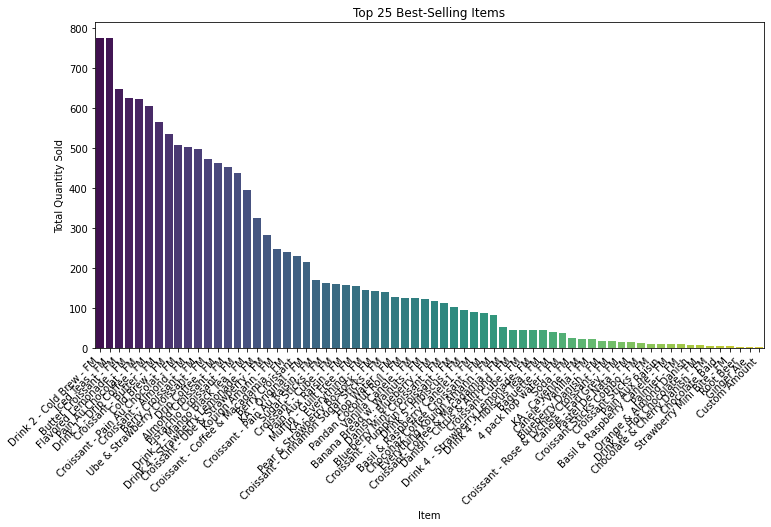

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate the total quantity sold for each item
df_item_sales = sales_dataset.groupby('Item', as_index=False)['Qty'].sum()

# Sort by quantity sold and take the top 10 items
df_top_items = df_item_sales.sort_values(by='Qty', ascending=False)

# Plot the histogram (bar chart)
plt.figure(figsize=(12, 6))
sns.barplot(data=df_top_items, x='Item', y='Qty', palette='viridis')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Labels and title
plt.xlabel("Item")
plt.ylabel("Total Quantity Sold")
plt.title("Top 25 Best-Selling Items")

# Show the plot
plt.show()


In [ ]:
# sales_dataset = sales_dataset.drop(["Week", "Week_TimeStamp"], axis=1)
# sales_dataset.to_csv("output.csv", index=False)

incorporate foot traffic

---

In [26]:
ft_dataset = pd.read_csv("og_foot_traffic_2324.csv")

In [27]:
ft_dataset.head()

,Date,7:00 AM,8:00 AM,9:00 AM,10:00 AM,11:00 AM
0,5/6/23,304,340,490,491,574
1,5/13/23,255,466,515,511,701
2,5/20/23,400,806,1010,924,652
3,5/27/23,348,503,843,1293,860
4,6/3/23,479,841,893,823,680


In [28]:
ft_dataset = ft_dataset.melt(id_vars=["Date"], var_name="Time", value_name="Traffic")

ft_dataset["Datetime"] = pd.to_datetime(ft_dataset["Date"] + " " + ft_dataset["Time"])
ft_dataset = ft_dataset.drop(columns=["Date", "Time"])

In [29]:
sales_dataset.head()

,Date,Time,Item,Qty,Datetime,Hour
0,2023-10-28,11:41:41,Drink 2 - Cold Brew - FM,1.0,2023-10-28 11:41:41,11
1,2023-10-28,11:40:39,Croissant - Pain Au Chocolat - FM,1.0,2023-10-28 11:40:39,11
2,2023-10-28,11:40:39,Croissant - Pumpkin Croissant - FM,1.0,2023-10-28 11:40:39,11
3,2023-10-28,11:34:11,Croissant - Pumpkin Croissant - FM,1.0,2023-10-28 11:34:11,11
4,2023-10-28,11:33:24,Croissant - Pain Au Chocolat - FM,1.0,2023-10-28 11:33:24,11


In [30]:
ft_dataset.head()

,Traffic,Datetime
0,304,2023-05-06 07:00:00
1,255,2023-05-13 07:00:00
2,400,2023-05-20 07:00:00
3,348,2023-05-27 07:00:00
4,479,2023-06-03 07:00:00


In [31]:
ft_dataset.to_csv("cleaned_ft_2324.csv", index=False)

In [32]:
sales_dataset['Hour'] = sales_dataset['Datetime'].dt.hour
ft_dataset['Hour'] = ft_dataset['Datetime'].dt.hour

sales_dataset['Date'] = sales_dataset['Datetime'].dt.date
ft_dataset['Date'] = ft_dataset['Datetime'].dt.date

In [33]:
combined_dataset = pd.merge(sales_dataset, ft_dataset[['Date', 'Hour', 'Traffic']], on=['Date', 'Hour'], how='left')

In [34]:
df_nulls = combined_dataset[combined_dataset.isna().any(axis=1)]

# Display the rows with null values
print(df_nulls)

             Date      Time                                 Item  Qty  \
603    2023-10-07  06:59:34                        Baguette - FM  1.0   
1932   2023-09-09  06:51:37           Drink 1 - Drip Coffee - FM  1.0   
2174   2023-08-05  06:59:24           Drink 1 - Drip Coffee - FM  1.0   
2175   2023-08-05  06:55:50                      Berry Croissant  1.0   
2176   2023-08-05  06:55:50  Croissant - Coffee & Macadamia - FM  1.0   
2491   2023-07-29  06:56:28    Croissant - Pain Au Chocolat - FM  1.0   
2492   2023-07-29  06:53:35                Croissant - Cube - FM  1.0   
3638   2023-06-20  08:07:15           Drink 1 - Drip Coffee - FM  2.0   
3639   2023-06-17  12:00:37              Croissant - Almond - FM  1.0   
4455   2023-06-10  06:58:03                   KA - Original - FM  2.0   
4456   2023-06-10  06:48:35           Drink 1 - Drip Coffee - FM  1.0   
5876   2024-10-19  12:00:31                Almond Croissant - FM  1.0   
6094   2024-10-19  06:56:59                     Dri

In [35]:
combined_dataset.isna().any(axis=1).sum()

38

In [36]:
mask = (combined_dataset['Datetime'].dt.hour == 6)
traffic_table_7am = (combined_dataset[combined_dataset['Hour'] == 7]).drop_duplicates(subset=['Date'])
combined_dataset.loc[mask, 'Traffic'] = combined_dataset.loc[mask, 'Date'].map(traffic_table_7am.set_index('Date')['Traffic'])

In [38]:
mask = (combined_dataset['Datetime'].dt.hour == 12)
traffic_table_11am = (combined_dataset[combined_dataset['Hour'] == 11]).drop_duplicates(subset=['Date'])
combined_dataset.loc[mask, 'Traffic'] = combined_dataset.loc[mask, 'Date'].map(traffic_table_11am.set_index('Date')['Traffic'])

In [39]:
df_nulls = combined_dataset[combined_dataset.isna().any(axis=1)]

# Display the rows with null values
print(df_nulls)

            Date      Time                        Item  Qty  \
3638  2023-06-20  08:07:15  Drink 1 - Drip Coffee - FM  2.0   

                Datetime  Hour  Traffic  
3638 2023-06-20 08:07:15     8      NaN  


In [40]:
combined_dataset.dropna(inplace=True)

In [41]:
combined_dataset.head()

,Date,Time,Item,Qty,Datetime,Hour,Traffic
0,2023-10-28,11:41:41,Drink 2 - Cold Brew - FM,1.0,2023-10-28 11:41:41,11,432.0
1,2023-10-28,11:40:39,Croissant - Pain Au Chocolat - FM,1.0,2023-10-28 11:40:39,11,432.0
2,2023-10-28,11:40:39,Croissant - Pumpkin Croissant - FM,1.0,2023-10-28 11:40:39,11,432.0
3,2023-10-28,11:34:11,Croissant - Pumpkin Croissant - FM,1.0,2023-10-28 11:34:11,11,432.0
4,2023-10-28,11:33:24,Croissant - Pain Au Chocolat - FM,1.0,2023-10-28 11:33:24,11,432.0


In [42]:
#combined_dataset = combined_dataset.drop(columns=['Date', 'Hour'])
combined_dataset['Traffic'] = combined_dataset['Traffic'].astype(int)
combined_dataset['Qty'] = combined_dataset['Qty'].astype(int)
#combined_dataset.to_csv("combined_dataset_2324.csv", index=False)

In [50]:
df_sales_per_event = combined_dataset.groupby(['Traffic', 'Date', 'Hour']).size().reset_index(name='Number Items Sold')

In [51]:
df_sales_per_event.head()

,Traffic,Date,Hour,Number Items Sold
0,184,2023-10-28,7,20
1,266,2023-10-28,8,38
2,280,2024-10-26,7,26
3,282,2023-10-07,6,1
4,282,2023-10-07,7,28


In [53]:
df_avg_sales = df_sales_per_event.groupby('Traffic', as_index=False)['Number Items Sold'].mean()

# Display the result
print(df_avg_sales.head())


   Traffic  Number Items Sold
0      184               20.0
1      266               38.0
2      280               26.0
3      282               14.5
4      286                6.0


In [55]:
# Create the plot using Plotly Express
fig = px.line(df_avg_sales, x='Traffic', y='Number Items Sold', title="Each point tells you... for a given hour: how much foot traffic was there and how many items were sold", markers=True)

# Show the plot
fig.show()

In [69]:
combined_dataset

,Date,Time,Item,Qty,Datetime,Hour,Traffic
0,2023-10-28,11:41:41,Drink 2 - Cold Brew - FM,1,2023-10-28 11:41:41,11,432
1,2023-10-28,11:40:39,Croissant - Pain Au Chocolat - FM,1,2023-10-28 11:40:39,11,432
2,2023-10-28,11:40:39,Croissant - Pumpkin Croissant - FM,1,2023-10-28 11:40:39,11,432
3,2023-10-28,11:34:11,Croissant - Pumpkin Croissant - FM,1,2023-10-28 11:34:11,11,432
4,2023-10-28,11:33:24,Croissant - Pain Au Chocolat - FM,1,2023-10-28 11:33:24,11,432
...,...,...,...,...,...,...,...
11844,2024-05-18,07:14:30,Butter Croissant - FM,1,2024-05-18 07:14:30,7,593
11845,2024-05-18,07:13:11,Kouign Amann - FM,1,2024-05-18 07:13:11,7,593
11846,2024-05-18,07:10:47,Almond Croissant - FM,1,2024-05-18 07:10:47,7,593
11847,2024-05-18,07:10:18,Ube & Strawberry Croissant - FM,1,2024-05-18 07:10:18,7,593


In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Prep data
combined_dataset['Hour'] = pd.to_datetime(combined_dataset['Datetime'], format='%H:%M:%S', errors='coerce').dt.hour
combined_dataset['DayOfWeek'] = combined_dataset['Datetime'].dt.dayofweek
combined_dataset['Month'] = combined_dataset['Datetime'].dt.month

# Aggregate sales per hour
hourly_sales = combined_dataset.groupby(['Datetime', 'Hour', 'Traffic', 'DayOfWeek', 'Month'])['Qty'].sum().reset_index()

# Drop missing traffic values
hourly_sales = hourly_sales.dropna()

# Define features and target
X = hourly_sales[['Hour', 'Traffic', 'DayOfWeek', 'Month']]
y = hourly_sales['Qty']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")

Mean Absolute Error: 0.83


In [73]:
print(y.mean())  # average actual sales
print(mae / y.mean())  # relative error


1.75742509485804
0.4712712014765343
